In [3]:
from video import df, display, generator, reader, vid
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt


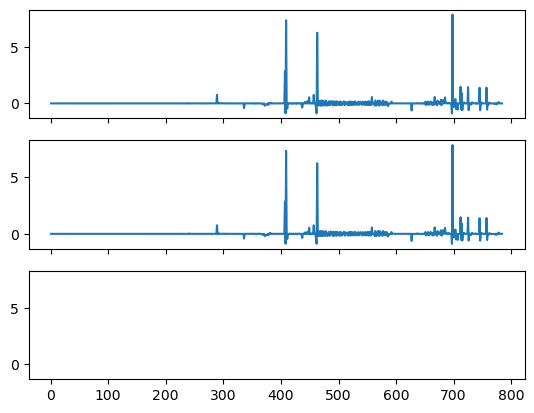

In [4]:

path = 'videos/Banned Pokemon Seizure Scene.mp4'
vid = vid.Video.from_file(path)
vid_2,_ = reader.VideoReader.get_vid(path)
vid_df = df.get_vid_df(vid_2)
fig,axs = plt.subplots(3,1,sharex=True,sharey=True)
axs[0].plot(vid_df.groupby(level=0).lightness.mean().pct_change(1).to_numpy())
axs[1].plot(vid.pct_change(1))

frame
0      101.233148
1      101.229630
2      101.204352
3      101.181667
4      101.148426
          ...    
780     43.425093
781     43.927315
782     43.904167
783     43.930093
784     43.933333
Name: lightness, Length: 785, dtype: float64